In [25]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from os import listdir
from os.path import isfile, join
path = 'ignored_assets/public_data/training_data/order_data'
onlyfiles = [f for f in listdir(path) if isfile(join(path, f)) and f != '.DS_Store']

In [4]:
onlyfiles

['order_data_2016-01-01',
 'order_data_2016-01-02',
 'order_data_2016-01-03',
 'order_data_2016-01-04',
 'order_data_2016-01-05',
 'order_data_2016-01-06',
 'order_data_2016-01-07',
 'order_data_2016-01-08',
 'order_data_2016-01-09',
 'order_data_2016-01-10',
 'order_data_2016-01-11',
 'order_data_2016-01-12',
 'order_data_2016-01-13',
 'order_data_2016-01-14',
 'order_data_2016-01-15',
 'order_data_2016-01-16',
 'order_data_2016-01-17',
 'order_data_2016-01-18',
 'order_data_2016-01-19',
 'order_data_2016-01-20',
 'order_data_2016-01-21']

In [5]:
orderdf = []
for f in onlyfiles:
    orderdf.append(pd.read_csv(join(path, f), delimiter='\t', header = None))

In [6]:
orderdf = pd.concat(orderdf)

In [7]:
orderdf.index = range(len(orderdf))

In [8]:
print 'unique drivers: ', len(orderdf[1].unique())

unique drivers:  93090


In [9]:
print 'unique users: ', len(orderdf[2].unique())

unique users:  1368071


In [10]:
print 'fraction of rides unmatched: ', float(len(orderdf[pd.isnull(orderdf[1])])) / len(orderdf)

fraction of rides unmatched:  0.177558662644


In [11]:
orderdf[6] = pd.to_datetime(orderdf[6])

In [12]:
orderdf.columns = ['order_id', 'driver_id', 'passenger_id', 'start_district_hash', 'dest_district_hash', 'price', 'timestamp']

In [13]:
orderdf.head()

,order_id,driver_id,passenger_id,start_district_hash,dest_district_hash,price,timestamp
0,97ebd0c6680f7c0535dbfdead6e51b4b,dd65fa250fca2833a3a8c16d2cf0457c,ed180d7daf639d936f1aeae4f7fb482f,4725c39a5e5f4c188d382da3910b3f3f,3e12208dd0be281c92a6ab57d9a6fb32,24.0,2016-01-01 13:37:23
1,92c3ac9251cc9b5aab90b114a1e363be,c077e0297639edcb1df6189e8cda2c3d,191a180f0a262aff3267775c4fac8972,82cc4851f9e4faa4e54309f8bb73fd7c,b05379ac3f9b7d99370d443cfd5dcc28,2.0,2016-01-01 09:47:54
2,abeefc3e2aec952468e2fd42a1649640,86dbc1b68de435957c61b5a523854b69,7029e813bb3de8cc73a8615e2785070c,fff4e8465d1e12621bc361276b6217cf,fff4e8465d1e12621bc361276b6217cf,9.0,2016-01-01 18:24:02
3,cb31d0be64cda3cc66b46617bf49a05c,4fadfa6eeaa694742de036dddf02b0c4,21dc133ac68e4c07803d1c2f48988a83,4b7f6f4e2bf237b6cc58f57142bea5c0,4b7f6f4e2bf237b6cc58f57142bea5c0,11.0,2016-01-01 22:13:27
4,139d492189ae5a933122c098f63252b3,NaN,26963cc76da2d8450d8f23fc357db987,fc34648599753c9e74ab238e9a4a07ad,87285a66236346350541b8815c5fae94,4.0,2016-01-01 17:00:06


In [14]:
orderdf['quarter_hour'] = orderdf['timestamp'].dt.round('15min')  

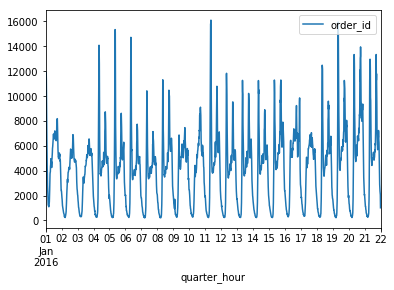

In [15]:
orderdf[['order_id', 'quarter_hour']].groupby(['quarter_hour']).count().plot()

In [16]:
tb = pd.pivot_table(orderdf, index=['quarter_hour'], columns=['start_district_hash'], values=['order_id'], aggfunc=len)

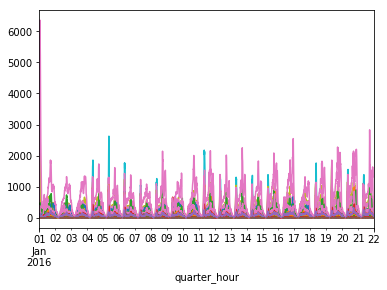

In [17]:
tb.plot(legend=False)

## Timeseries Questions:

- Can we predict demand _accurately_ and with a level of _certainty_
- Can we detect anomalies? For example, when there is an event. 
- Are these _all_ the rides in that timespan?

## Users

In [18]:
pass_rides = orderdf[['order_id', 'passenger_id']].groupby(['passenger_id']).count()

In [19]:
pass_rides[pass_rides['order_id'] == pass_rides['order_id'].max()]

,order_id
passenger_id,
56018323b921dd2c5444f98fb45509de,232797


In [20]:
weird_passdf = orderdf[orderdf['passenger_id'] == '56018323b921dd2c5444f98fb45509de'].sort(['timestamp'])

/Users/ramoniglesias/development/cs341/venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


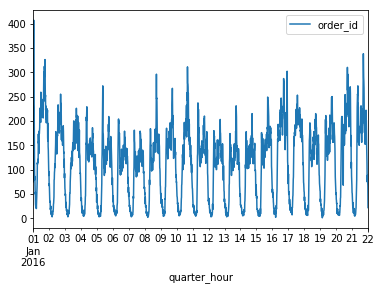

In [21]:
weird_passdf[['order_id', 'quarter_hour']].groupby(['quarter_hour']).count().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114642850>]], dtype=object)

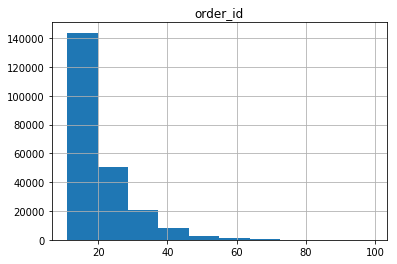

In [36]:
pass_rides[(pass_rides['order_id'] > 10) & (pass_rides['order_id'] < 100)].hist(bins=10)

## User questions:

- What is up with the "super user"?
- How we cluster them by style? 
- Do weather, traffic, etc affect the different usage clusters differently?

## Riders

### Steps
- Preprocessing
 

In [ ]:
driver_rides = orderdf[['order_id', 'driver_id']].groupby(['driver_id'])

In [1]:
driver_rides

NameError: name 'driver_rides' is not defined

## Other ideas

- Anomaly detection (e.g. events)
- Backtrace surge pricing

### Steps
- Preprocessing for Riders (Ramon) 
- Cluster Rider/Driver Behavior (Ramon)
- Explore how Weather/Pollution/Traffic affect (Kevin)
- Explore mismatch (Kevin)
- How do users behave when there is a mismatch?
- Explore Surge Pricing
- Events detection (Federico)

### Notes
- Can I quantify what is happening?
- Then get to idea.
- How do drivers behave in a ride-sharing economy, how could I quantify this economic system?
- We have much more data per driver than the other way around. 
- The problem with clustering is that you need to justify. Connect the different types of drivers to the efficiency of the system.
- Could you compute when is it most beneficial to driver? when are we missing drivers? is it best to driive on rush hour? When? For a measure of maximum profit.
- In NYC, taxi _must_ work, they paid for the license. 
- Can we find surge pricing in specific types of drivers (assuming some are normal taxi, other are rideshares)

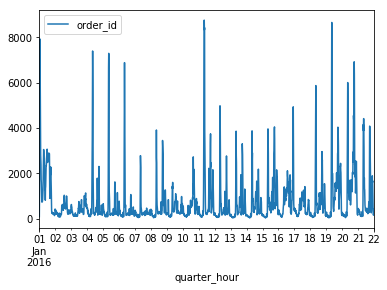

In [27]:
orderdf[['order_id', 'quarter_hour']][pd.isnull(orderdf['driver_id'])].groupby(['quarter_hour']).count().plot()

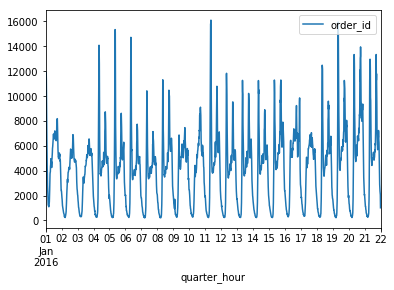

In [28]:
orderdf[['order_id', 'quarter_hour']].groupby(['quarter_hour']).count().plot()

In [29]:
without_mismatch  = orderdf[['order_id', 'quarter_hour']].groupby(['quarter_hour']).count() -orderdf[['order_id', 'quarter_hour']][pd.isnull(orderdf['driver_id'])].groupby(['quarter_hour']).count()

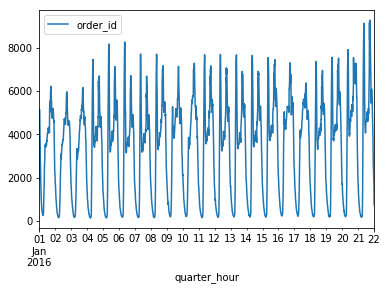

In [31]:
without_mismatch.plot()

In [35]:
orderdf.to_csv('ignored_assets/orders.csv', index=False)